In [61]:
import numpy as np # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame

In [62]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [63]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder

In [64]:
data= pd.read_csv('../data/mushrooms.csv') # we have inserted our data
data.shape



(8124, 23)

In [65]:
data.head(5) # usingg head will print desire number of row as in this we need 5.


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Changing input from letter to number

Since all the input variables are categorical, we can encode everything using LabelEncoder. For the target variable (class), 1 is poisonous and 0 is eatable.

In [66]:
labelencoder=LabelEncoder() # it convert the words data into number form
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Now we can seperate the input and target variables. As we have seen from above, the first variable is the target variable. The rest 22 variables are input variables.

In [67]:
input_sample = data.iloc[:, 1:23].values # here all column are input except first
target = data.iloc[:, 0].values


Next we split the dataset into train and set. We will use 80% for training and 20% for testing.

In [68]:
input_sample_train, input_sample_test, target_train, target_test = train_test_split(input_sample, target, test_size = 0.35, random_state = 0)
input_sample_train.shape
# we have to use same name as above cell before test and train

(5280, 22)

In [69]:
scaler = StandardScaler()
sample_training_scaled = scaler.fit_transform(input_sample_test) # here input_sample_test is input variable that we have separated above
sample_validation_scaled = scaler.fit_transform(input_sample_train) # they both are used instead of sample validation and sample_training.

In [70]:
seed = 193 #generates a random number
discriminator_nodes =  16 # 20
discriminator_layers = 1
discriminator_epochs = 200
validation_fraction = 0.4
discriminator_dropout =  0.4
        
batchSize = 128 # 512
discriminator_optimizer = SGD(lr =0.01)
discriminator_history_array = []

In [71]:
# Create the model 

# Inputlayer
network_input = Input( shape = 22) # here we used 22 as dimension given .
# Hidden layer 
neural_network_layer = Dense(discriminator_nodes, activation = "elu", name="HiddenLayer")(network_input)
# 0utput layer
neural_network_layer = Dense(1, activation = "sigmoid")(neural_network_layer)
        
model = Model(inputs=network_input, outputs= neural_network_layer)
model.summary()
plot_model(model, 'neural_network_graph.pdf')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
HiddenLayer (Dense)          (None, 16)                368       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 385
Trainable params: 385
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [72]:
# compile_model

model.compile(loss = "binary_crossentropy", weighted_metrics = [metrics.binary_accuracy], optimizer = "adam", metrics=['accuracy'])

 In this we dont have sample validation so we used input_sample_test intstead of it, sample_input_train instead of sample training, target_test instead of target validation, target_train instead of target training we removed weight from the previous model because tensorflow automatically takes weight.

In [73]:
# fit_model

discriminator_history = model.fit(input_sample_train, target_train.ravel(), epochs=discriminator_epochs, batch_size = batchSize, validation_data = (input_sample_test, target_test))
discriminator_history_array.append(discriminator_history) 

Epoch 1/200
42/42 [==============================] - 1s 15ms/step - loss: 1.7682 - accuracy: 0.5435 - binary_accuracy: 0.5435 - val_loss: 0.8304 - val_accuracy: 0.5844 - val_binary_accuracy: 0.5844
Epoch 2/200
42/42 [==============================] - 0s 9ms/step - loss: 0.7849 - accuracy: 0.6314 - binary_accuracy: 0.6314 - val_loss: 0.6349 - val_accuracy: 0.7085 - val_binary_accuracy: 0.7085
Epoch 3/200
42/42 [==============================] - 0s 8ms/step - loss: 0.6193 - accuracy: 0.7148 - binary_accuracy: 0.7148 - val_loss: 0.5277 - val_accuracy: 0.7535 - val_binary_accuracy: 0.7535
Epoch 4/200
42/42 [==============================] - 0s 8ms/step - loss: 0.5248 - accuracy: 0.7473 - binary_accuracy: 0.7473 - val_loss: 0.4493 - val_accuracy: 0.8070 - val_binary_accuracy: 0.8070
Epoch 5/200
42/42 [==============================] - 0s 10ms/step - loss: 0.4309 - accuracy: 0.8054 - binary_accuracy: 0.8054 - val_loss: 0.3892 - val_accuracy: 0.8368 - val_binary_accuracy: 0.8368
Epoch 6/200
4

42/42 [==============================] - 0s 7ms/step - loss: 0.0834 - accuracy: 0.9756 - binary_accuracy: 0.9756 - val_loss: 0.0781 - val_accuracy: 0.9778 - val_binary_accuracy: 0.9778
Epoch 43/200
42/42 [==============================] - 0s 9ms/step - loss: 0.0789 - accuracy: 0.9777 - binary_accuracy: 0.9777 - val_loss: 0.0745 - val_accuracy: 0.9800 - val_binary_accuracy: 0.9800
Epoch 44/200
42/42 [==============================] - 0s 8ms/step - loss: 0.0715 - accuracy: 0.9817 - binary_accuracy: 0.9817 - val_loss: 0.0716 - val_accuracy: 0.9810 - val_binary_accuracy: 0.9810
Epoch 45/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0722 - accuracy: 0.9829 - binary_accuracy: 0.9829 - val_loss: 0.0689 - val_accuracy: 0.9842 - val_binary_accuracy: 0.9842
Epoch 46/200
42/42 [==============================] - 0s 8ms/step - loss: 0.0726 - accuracy: 0.9816 - binary_accuracy: 0.9816 - val_loss: 0.0658 - val_accuracy: 0.9845 - val_binary_accuracy: 0.9845
Epoch 47/200
42/42 [===

42/42 [==============================] - 0s 8ms/step - loss: 0.0215 - accuracy: 0.9953 - binary_accuracy: 0.9953 - val_loss: 0.0187 - val_accuracy: 0.9975 - val_binary_accuracy: 0.9975
Epoch 84/200
42/42 [==============================] - 0s 7ms/step - loss: 0.0200 - accuracy: 0.9986 - binary_accuracy: 0.9986 - val_loss: 0.0182 - val_accuracy: 0.9965 - val_binary_accuracy: 0.9965
Epoch 85/200
42/42 [==============================] - 0s 9ms/step - loss: 0.0193 - accuracy: 0.9978 - binary_accuracy: 0.9978 - val_loss: 0.0184 - val_accuracy: 0.9989 - val_binary_accuracy: 0.9989
Epoch 86/200
42/42 [==============================] - 0s 9ms/step - loss: 0.0182 - accuracy: 0.9985 - binary_accuracy: 0.9985 - val_loss: 0.0172 - val_accuracy: 0.9986 - val_binary_accuracy: 0.9986
Epoch 87/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0184 - accuracy: 0.9993 - binary_accuracy: 0.9993 - val_loss: 0.0165 - val_accuracy: 0.9982 - val_binary_accuracy: 0.9982
Epoch 88/200
42/42 [===

42/42 [==============================] - 0s 7ms/step - loss: 0.0074 - accuracy: 0.9998 - binary_accuracy: 0.9998 - val_loss: 0.0065 - val_accuracy: 0.9996 - val_binary_accuracy: 0.9996
Epoch 125/200
42/42 [==============================] - 0s 10ms/step - loss: 0.0069 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 126/200
42/42 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9998 - binary_accuracy: 0.9998 - val_loss: 0.0061 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 127/200
42/42 [==============================] - 0s 9ms/step - loss: 0.0066 - accuracy: 0.9997 - binary_accuracy: 0.9997 - val_loss: 0.0059 - val_accuracy: 0.9996 - val_binary_accuracy: 0.9996
Epoch 128/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0063 - accuracy: 0.9999 - binary_accuracy: 0.9999 - val_loss: 0.0059 - val_accuracy: 0.9996 - val_binary_accuracy: 0.9996
Epoch 129/200
42/4

42/42 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 166/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0028 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 167/200
42/42 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 168/200
42/42 [==============================] - 0s 7ms/step - loss: 0.0027 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 169/200
42/42 [==============================] - 0s 6ms/step - loss: 0.0024 - accuracy: 1.0000 - binary_accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000 - val_binary_accuracy: 1.0000
Epoch 170/200
42/42

In [74]:
# predict_model
model_prediction = model.predict(input_sample_test).ravel()
model_val_prediction = model.predict(input_sample_train).ravel()


fpr, tpr, threshold = roc_curve(target_test, model_prediction)
fpr_2, tpr_2, threshold_2 = roc_curve(target_train, model_val_prediction)
auc_1 = auc(fpr, tpr)
auc_2 = auc(fpr_2, tpr_2)

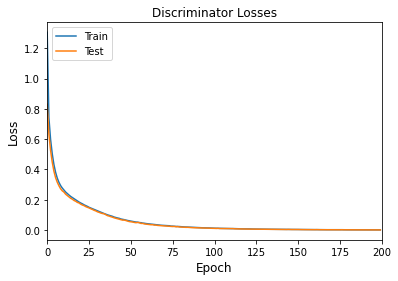

In [75]:
# plotLosses

plt.plot(discriminator_history.history['loss'])
plt.plot(discriminator_history.history['val_loss'])
plt.title('Discriminator Losses',fontsize='large')
plt.ylabel('Loss',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.xlim(0,discriminator_epochs)
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('losses.pdf')

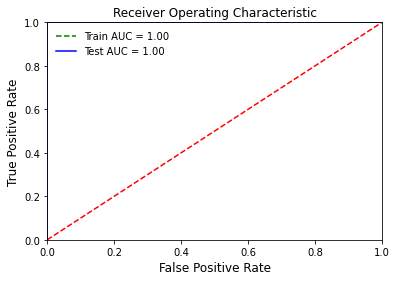

In [76]:
# plotRoc

plt.title('Receiver Operating Characteristic',fontsize='large')
plt.plot(fpr_2, tpr_2, 'g--', label='Train AUC = %0.2f'% auc_2)
plt.plot(fpr, tpr, 'b', label='Test AUC = %0.2f'% auc_1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.,1.])
plt.ylim([-0.,1.])
plt.ylabel('True Positive Rate', fontsize='large')
plt.xlabel('False Positive Rate', fontsize='large')
plt.legend(frameon=False)
plt.savefig('roc.pdf')

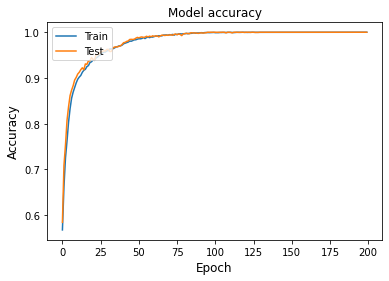

In [77]:
# plotAccuracy

plt.plot(discriminator_history.history['accuracy'])
plt.plot(discriminator_history.history['val_accuracy'])
plt.title('Model accuracy',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
plt.xlabel('Epoch',fontsize='large')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('acc.pdf')

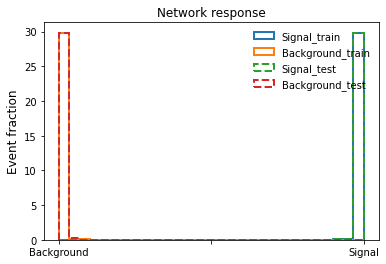

<Figure size 432x288 with 0 Axes>

In [78]:
# plotSeparation

signal_histo = []
background_histo = []
signal_histo_train = []
background_histo_train = []
for i in range(len(input_sample_test)):
    if target_test[i] == 1:
        signal_histo.append(model_prediction[i])
    if target_test[i] == 0:
        background_histo.append(model_prediction[i])
for i in range(len(input_sample_train)):
    if target_train[i] == 1:
        signal_histo_train.append(model_val_prediction[i])
    if target_train[i] == 0:
        background_histo_train.append(model_val_prediction[i])
        
plt.hist(signal_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Signal_train")
plt.hist(background_histo_train, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, label = "Background_train")
plt.hist(signal_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed',  label = "Signal_test")
plt.hist(background_histo, range=[0., 1.], linewidth = 2, bins=30, histtype="step", density = True, linestyle='dashed', label = "Background_test")
        
plt.legend()
plt.title('Network response',fontsize='large')
plt.xticks([0.0,0.5,1.0],["Background","","Signal"],rotation=0)
# plt.xlabel('Network response', horizontalalignment='left', fontsize='large')
plt.ylabel('Event fraction', fontsize='large')
plt.legend(frameon=False)
plt.show()
plt.savefig("separation_discriminator.pdf", dpi=400,  bbox_inches='tight')